In [3]:
import pandas as pd
! git clone http://github.com/taehojo/data.git

df = pd.read_csv('./data/iris3.csv')
df.head()

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 19 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 467.72 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (6/6), done.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

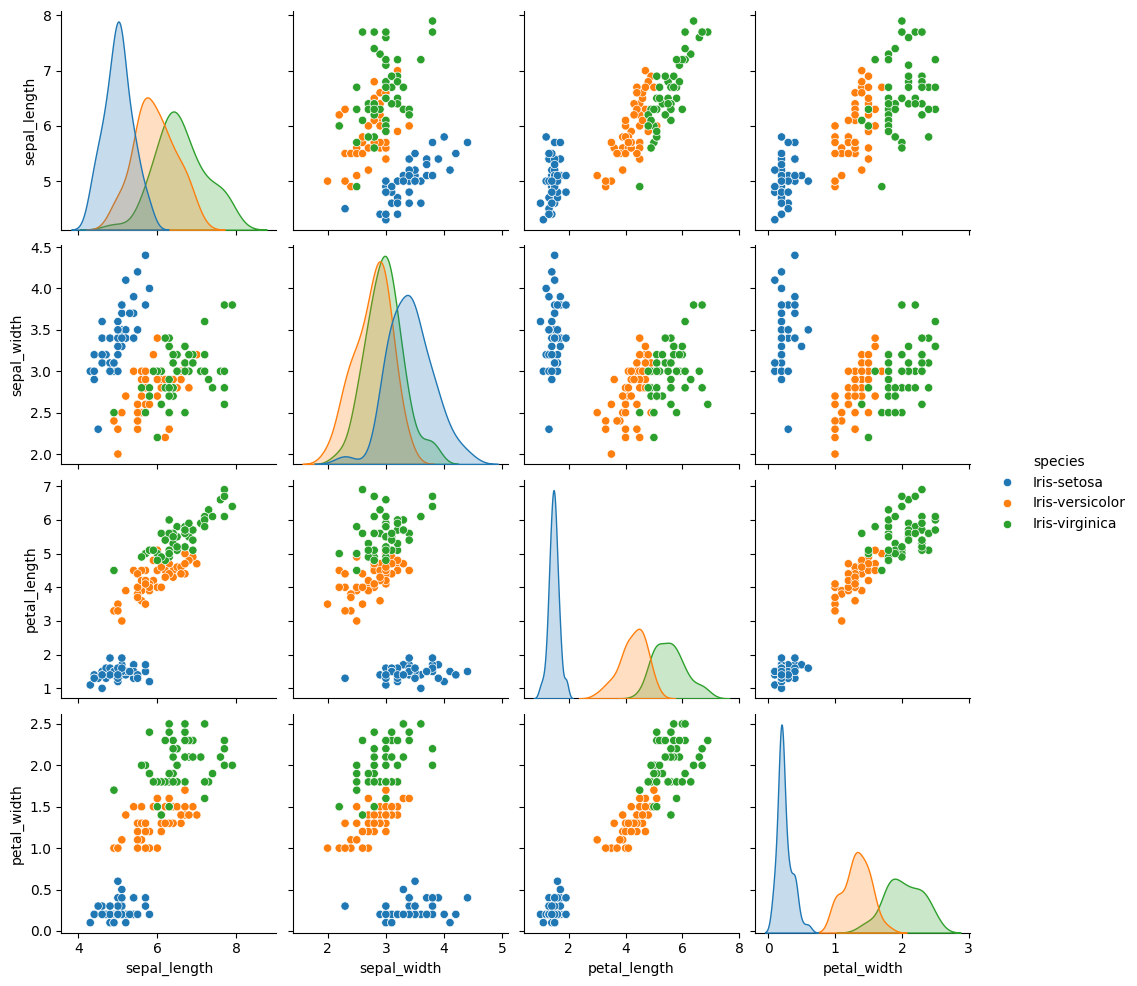

In [6]:
sns.pairplot(df, hue='species')
plt.show()

In [8]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: speci

In [9]:
print(x[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [11]:
y=pd.get_dummies(y)
y[0:5]

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


### 소프트맥스

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## 컴파일

In [16]:
model =Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

## 실행

In [17]:
history=model.fit(x, y, epochs=50, batch_size=5)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4468 - loss: 1.8259
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7474 - loss: 0.8065  
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9232 - loss: 0.6336 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8997 - loss: 0.5854 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.5561 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.5088 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.5089 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9141 - loss: 0.4684 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9604 - loss: 0.4441 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9465 - loss: 0.4413 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9405 - loss: 0.4162  
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [1]:
import pandas as pd
! git clone http://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head()

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 19 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 467.72 KiB | 6.88 MiB/s, done.
Resolving deltas: 100% (6/6), done.


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

,0
pregnant,0
plasma,0
pressure,0
thickness,0
insulin,0
bmi,0
pedigree,0
age,0
diabetes,0


In [ ]:
import seaborn as sns
import pandas as pd
titanic  =sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())

In [ ]:
titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
titanic['embark_town']= titanic['embark_town'].fillna("Southampton")
titanic['embarked']= titanic['embarked'].fillna("S")


In [ ]:
titanic['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
titanic['deck']=titanic['deck'].fillna('C')

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.pclass.value_counts()
titanic.alone.value_counts()

,count
alone,
True,537
False,354


## 시각화

In [ ]:
import matplotlib.pyplot as plt

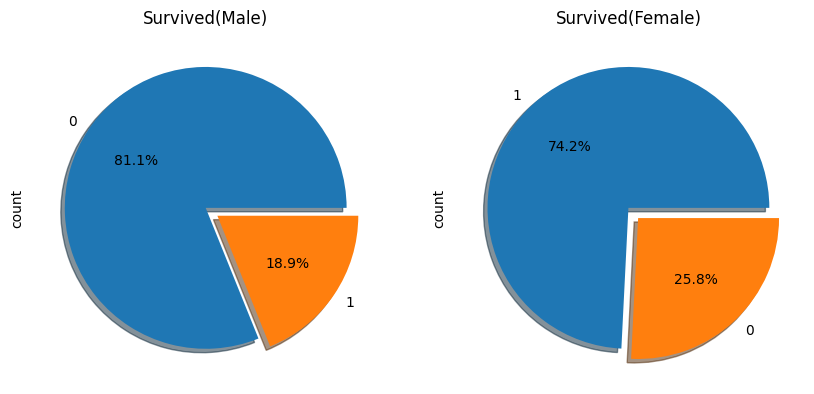

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title("Survived(Male)")
ax[1].set_title("Survived(Female)")
plt.show()

#### 차트화

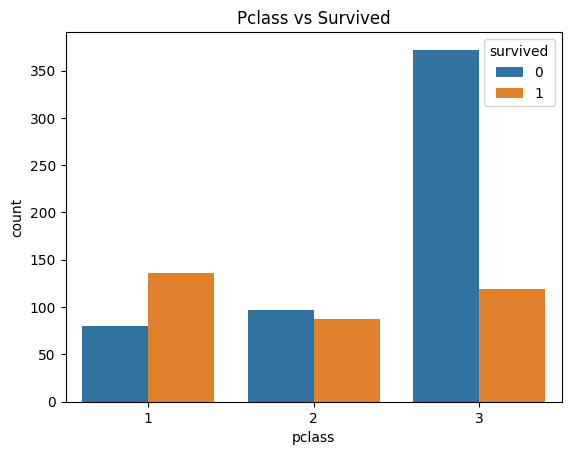

In [ ]:
sns.countplot(x='pclass', hue = 'survived', data = titanic)
plt.title("Pclass vs Survived")
plt.show()

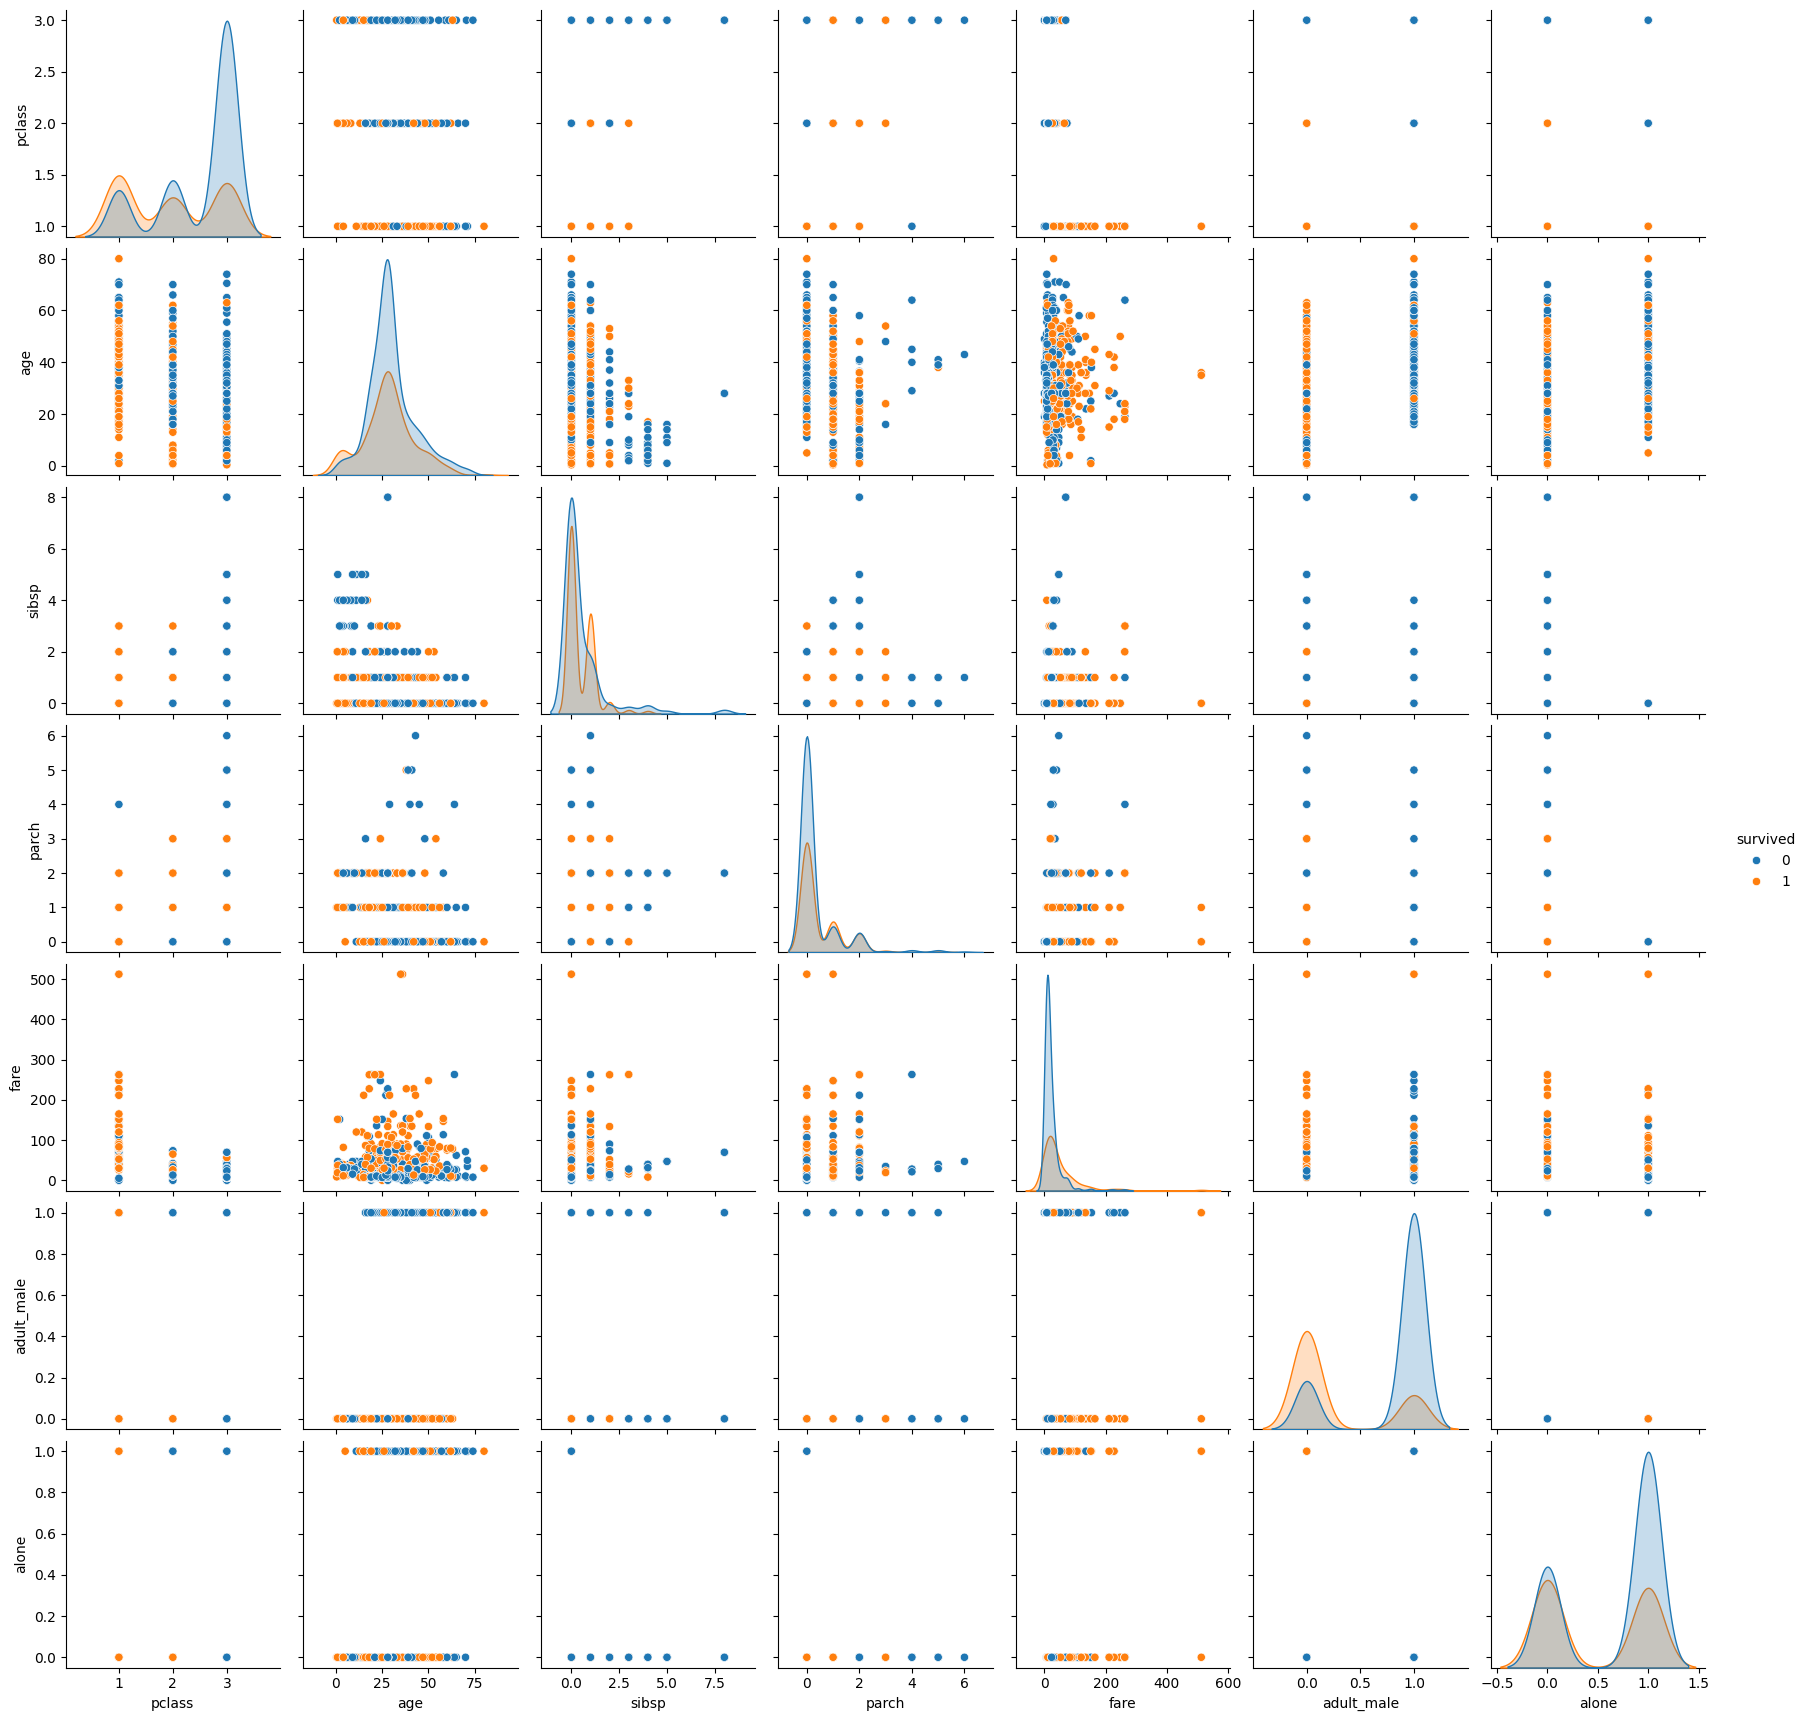

In [ ]:
sns.pairplot(titanic,hue='survived')
plt.show()

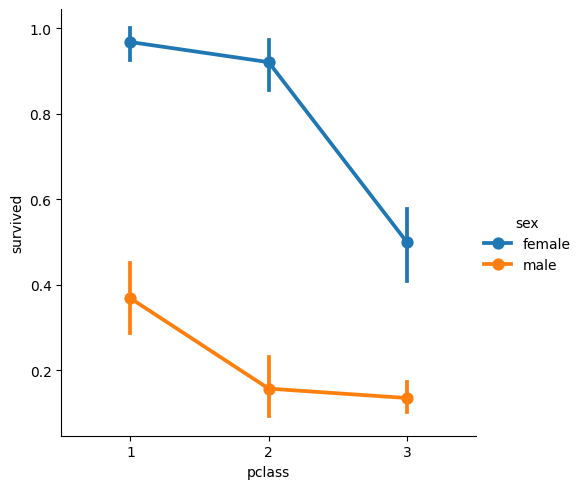

In [ ]:
sns.catplot(x='pclass',y='survived',hue='sex',data=titanic, kind='point')
plt.show()

In [ ]:
# titanic_corr = titanic.corr(method = 'pearson',numeric_only=True)
# titanic_corr.to_csv('/content/titanic3.csv',index = False)
# df3=pd.read_csv('/content/titanic3.csv')
# df3.info()

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    else:
        return 6


In [ ]:
print(titanic['age'].apply(type).value_counts())

age
<class 'float'>    891
Name: count, dtype: int64


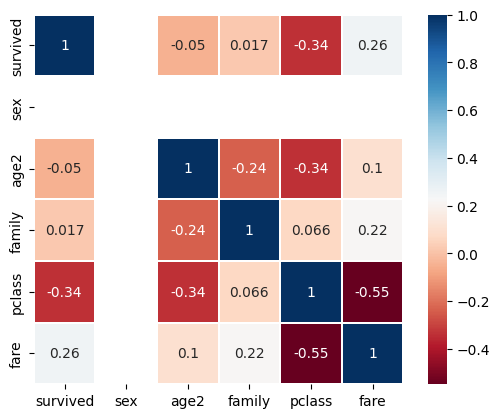

In [148]:
titanic['age2'] = titanic['age'].apply(category_age)
# titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['sex'] = titanic['sex'].map({'male':0,'female':1})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.to_csv('./titanic3.csv', index =False)
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass','fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax= 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size": 10})

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Numpy  실습

In [ ]:
import numpy as np

### shape, dtype 변경

In [ ]:
x=np.arange(0,9,1.)
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
y=np.reshape(x,(3,3))
y

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [ ]:
x.shape=(3,3)
x

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [ ]:
a=np.arange(3);
a

array([0, 1, 2])

In [ ]:
a.astype(int)
a.astype('int32')
a.astype('int64')

array([0, 1, 2])

In [ ]:
a.astype(float)
a.astype('float32')
a.astype('float64')

array([0., 1., 2.])

### 인덱싱

In [ ]:
a= np.array([1.2,-1.3,2.2,2,5.3])
a

array([ 1.2, -1.3,  2.2,  2. ,  5.3])

In [ ]:
a[0]
a[0:3]
a[-1]
a[-2]
a[0:-1]

array([ 1.2, -1.3,  2.2,  2. ])

In [ ]:
idx= [0,3]
a[idx]

array([1.2, 2. ])

### 행렬 합치기

In [ ]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6]])
a,b

(array([[1, 2],
        [3, 4]]),
 array([[5, 6]]))

In [ ]:
np.concatenate((a,b),axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.concatenate((a,b.T),axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [ ]:
a=np.array([[1,2,3]])
b=np.array([[4,5,6]])
a,b

(array([[1, 2, 3]]), array([[4, 5, 6]]))

In [ ]:
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.hstack((a,b))

array([[1, 2, 3, 4, 5, 6]])

In [ ]:
c=np.append(a,b)
c

array([1, 2, 3, 4, 5, 6])

### 행렬 연산

In [ ]:
a=np.array([1,2,3,4])
b=np.array([4,5,6,7])

In [ ]:
a+b
a*b
a**2
a+2

array([3, 4, 5, 6])

In [ ]:
10*np.sin(a)
a<3
a*=b
a

array([ 4, 10, 18, 28])

### 브로드캐스팅


In [ ]:
import numpy as np

In [ ]:
a=np.arange(9.).reshape(3,3)
x=np.array([1.,0,0])
y=x.reshape(1,3)
z=x.reshape(3,1)


In [ ]:
a+1

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [ ]:
a,x,y,z

(array([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]),
 array([1., 0., 0.]),
 array([[1., 0., 0.]]),
 array([[1.],
        [0.],
        [0.]]))

In [ ]:
a+x,a+y,a+z

(array([[1., 1., 2.],
        [4., 4., 5.],
        [7., 7., 8.]]),
 array([[1., 1., 2.],
        [4., 4., 5.],
        [7., 7., 8.]]),
 array([[1., 2., 3.],
        [3., 4., 5.],
        [6., 7., 8.]]))

In [ ]:
y+z

array([[2., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

# pandas 실습

In [ ]:
import pandas as pd

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/train.csv'
df= pd.read_csv(file_path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [ ]:
df.loc[[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df.loc[1,'Name']

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [ ]:
df.loc[:,'Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df.loc[8,'Name']  #johnson 출력
df.loc[8,'Fare']

df.loc[:,:'Age']

df.loc[:,'Survived':'Sex']


df.loc[:9,'Survived':'Age']

df.loc[10:19,'Survived':'Age']



,Survived,Pclass,Name,Sex,Age
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0
12,0,3,"Saundercock, Mr. William Henry",male,20.0
13,0,3,"Andersson, Mr. Anders Johan",male,39.0
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0
16,0,3,"Rice, Master. Eugene",male,2.0
17,1,2,"Williams, Mr. Charles Eugene",male,NaN
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0
19,1,3,"Masselmani, Mrs. Fatima",female,NaN


In [ ]:
df.loc[:,:'Name']
df.loc[:4,:'Name']

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [ ]:
df.iloc[:,:4]  #3일 때는 pcalss 4일때는 Name
df.iloc[:4,:4]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"


In [ ]:
condition=(df['Pclass']==3) & (df["Survived"]==1)
condition=(df['Pclass']==1) & (df["Survived"]==1)
condition=(df["Survived"]==1)

df.loc[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df[['Pclass','Name']]

,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
...,...,...
886,2,"Montvila, Rev. Juozas"
887,1,"Graham, Miss. Margaret Edith"
888,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,"Behr, Mr. Karl Howell"


In [ ]:
df.iloc[5,9]

8.4583

In [ ]:
df.iloc[:, 3:6]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# matplotlib 실습

#### ex1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x=np.linspace(0,1,50)

y1=np.cos(4*np.pi*x)
y2=np.cos(4*np.pi*x)*np.exp(-2*x)

x,y1,y2

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([ 1.        ,  0.96729486,  0.8713187 ,  0.71834935,  0.51839257,
         0.28452759,  0.03205158, -0.22252093, -0.46253829, -0.67230089,
        -0.8380881 , -0.94905575, -0.99794539, -0.98155916, -0.90096887,
        -0.76144596, -0.57211666, -0.34536505, -0.09602303,  0.1595999 ,
         0.40478334,  0.62

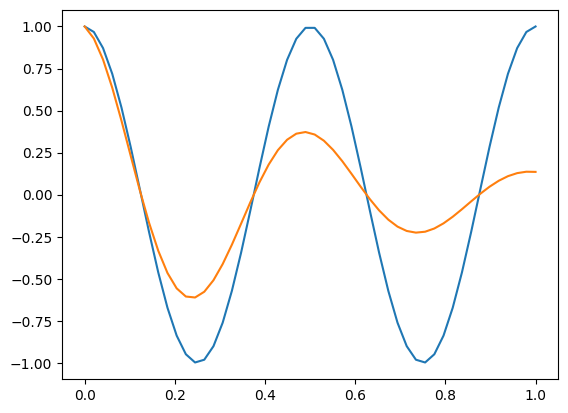

In [ ]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

##### 숫자변경

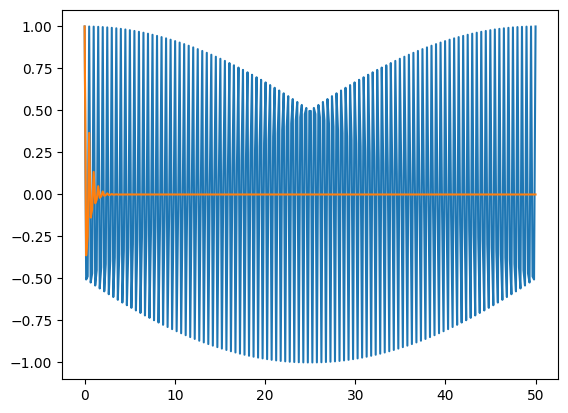

In [ ]:
x=np.linspace(0,50,300)

y1=np.cos(4*np.pi*x)
y2=np.cos(4*np.pi*x)*np.exp(-2*x)

x,y1,y2

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

#### ex4

In [ ]:
x=np.linspace(0,1,50)

y1=np.cos(4*np.pi*x)
y2=np.cos(4*np.pi*x)*np.exp(-2*x)

x,y1,y2

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([ 1.        ,  0.96729486,  0.8713187 ,  0.71834935,  0.51839257,
         0.28452759,  0.03205158, -0.22252093, -0.46253829, -0.67230089,
        -0.8380881 , -0.94905575, -0.99794539, -0.98155916, -0.90096887,
        -0.76144596, -0.57211666, -0.34536505, -0.09602303,  0.1595999 ,
         0.40478334,  0.62

Text(0.5, 1.0, '$sin(4|pi x)$ vs. $e^{-2x} sin(4|pi x)$')

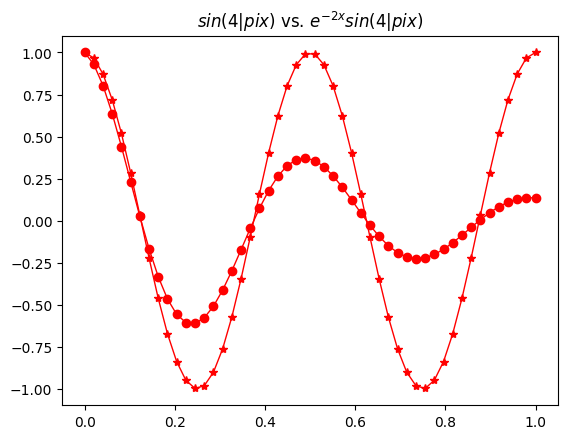

In [ ]:
plt.plot(x,y1,'r-*',label=r'$sin(4|pi x)$',lw=1)
plt.plot(x,y2,'r-o',label=r'$e^{-2x} sin(4|pi x)$',lw=1)
plt.title(r'$sin(4|pi x)$ vs. $e^{-2x} sin(4|pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.text=(0.5,-1.0,r'This is sample')
plt.axis([0.1,-1.5,1.5])
plt.grid(True)
